In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("weatherAUS.csv")

In [3]:
data.replace('Yes', 1, inplace=True)
data.replace('No', 0, inplace=True)
data.fillna(0, inplace=True)
data.drop(data.select_dtypes(['object']).columns, axis=1, inplace=True)
print(data)
scaler = StandardScaler()
data = scaler.fit_transform(data)
print (pd.DataFrame(data))

        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6          0.0       0.0           44.0   
1           7.4     25.1       0.0          0.0       0.0           44.0   
2          12.9     25.7       0.0          0.0       0.0           46.0   
3           9.2     28.0       0.0          0.0       0.0           24.0   
4          17.5     32.3       1.0          0.0       0.0           41.0   
...         ...      ...       ...          ...       ...            ...   
145455      2.8     23.4       0.0          0.0       0.0           31.0   
145456      3.6     25.3       0.0          0.0       0.0           22.0   
145457      5.4     26.9       0.0          0.0       0.0           37.0   
145458      7.8     27.0       0.0          0.0       0.0           28.0   
145459     14.9      0.0       0.0          0.0       0.0            0.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0         

In [4]:
def EuclidianDistance(centroids, dp):
    ED = np.sqrt(np.sum((centroids - dp)**2, axis=1))
    return (ED)
import numpy as np
 
    

In [5]:
def Kmeans(data,k,max_iters):
    centroids = np.random.uniform(np.amin(data,axis=0),np.amax(data,axis=0),size=(k,data.shape[1]))
    print (centroids)
    for i in range (max_iters):
        y = []
        for dp in data:
            distance = EuclidianDistance(dp,centroids)
            k_num = np.argmin(distance)
            y.append(k_num)
        y = np.array(y)
        cluster_index = []
        for j in range(k):
            cluster_index.append(np.argwhere(y==j))
        cluster_centers = []
        for i,indices in enumerate(cluster_index):
            if len(indices) == 0:
                cluster_centers.append(centroids[i])
            else:
                cluster_centers.append(np.mean(data[indices],axis=0)[0])
        if np.max (centroids - np.array(cluster_centers))<0.0001:
            break
        else :
            centroids = np.array(cluster_centers)
    return y
        
        
        

C:\Users\vedan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vedan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vedan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vedan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vedan\anaconda3\Lib\site-packages\sklearn\clust

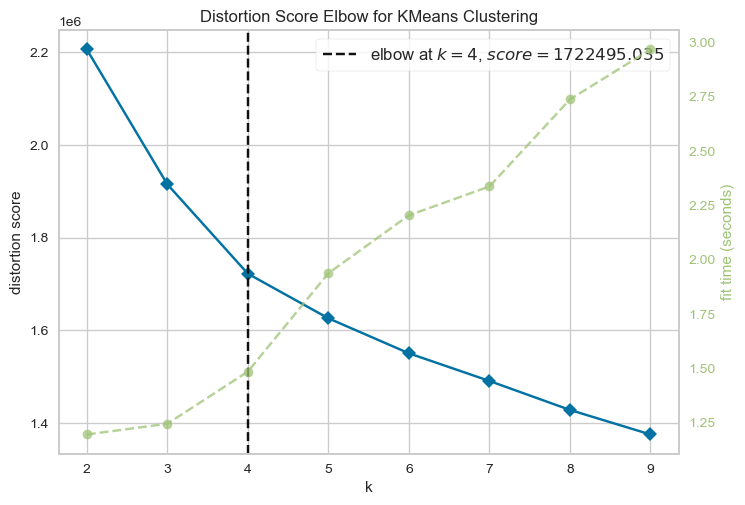

In [8]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(data)  
visualizer.show()    
plt.show()



In [9]:
k = 4
max_iters = 1000

In [ ]:
cluster_assignments = Kmeans(data, k, max_iters)

[[ 2.90464840e+00  1.92787917e+00  2.69831234e+01  2.52298343e+01
   1.65199224e+00  5.03059991e+00  2.58571628e+00 -1.58482528e+00
  -1.82413893e+00 -2.17727576e+00 -2.14271798e+00 -2.72370766e+00
   1.33382213e+00  1.07319463e+00 -3.50330282e+00 -2.81697935e+00
   1.46808846e+00  4.46150676e-01]
 [-3.13441693e+00  2.86156002e+00  6.28027951e+00  3.32204168e+01
   3.35860058e-01  2.53308814e+00  1.19232058e+00  2.98600554e+00
  -2.26587506e-01 -2.16070332e+00 -2.64667770e+00  2.41336657e-01
  -2.55290377e-01  1.00982148e+00 -4.95860213e-01  1.04612754e+00
  -2.35798957e-01  1.16905435e+00]
 [ 1.59314255e+00 -2.05413956e+00  5.05233578e+00  2.55367171e+01
   2.38051774e-01  4.64859257e+00  1.09378959e+01  3.65723666e+00
  -1.50494357e+00  6.40669301e-01 -2.45474773e-01 -2.11450688e+00
   7.37226448e-01  1.25893121e+00 -3.18587417e-02  1.39260219e-01
   3.46109867e-01  9.00611915e-01]
 [ 7.11569589e-01  3.28853189e+00  3.28130047e+01  8.98872445e+00
  -2.28830203e-02  3.92166049e+00  1.

[0 0 1 ... 0 0 0]


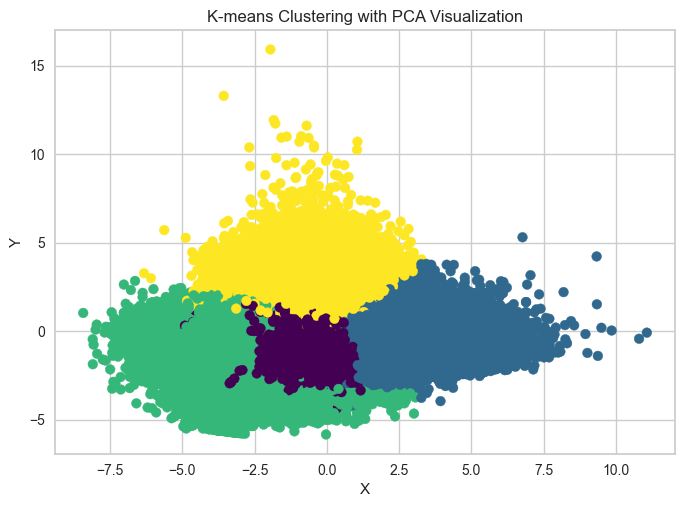

In [244]:
pca = PCA(n_components=8)
data_pca = pca.fit_transform(data)
print (cluster_assignments)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_assignments, cmap='viridis')
plt.title('K-means Clustering with PCA Visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()